<a href="https://colab.research.google.com/github/vurner/wawa/blob/master/NLP_Utra_Skincare_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Dependancies Libraries**
**Pandas**
Pandas is a Python library for data manipulation and analysis, providing easy-to-use data structures for complex data tasks such as cleaning, selection, transformation, and analysis.

**re**The re library in Python enables users to work with regular expressions for pattern matching and text processing tasks, such as data cleaning, information extraction, and input validation.

 **matplotlib** Python library for creating high-quality data visualizations such as line, bar, and scatter plots, histograms, and heatmaps, making it ideal for exploratory data analysis and presentation

 **operator**The operator library in Python provides efficient and concise functions that can replace common operators such as +, -, *, and /,, useful for sorting, filtering and transforming complex data structures

 **nltk** The NLTK (Natural Language Toolkit) library in Python is used for natural language processing tasks, such as tokenization, stemming, tagging, and sentiment analysis, making it ideal for analyzing text data.

 **collections** The collections library in Python provides specialized container datatypes such as named tuples, ordered dictionaries, counters, and deques, useful for tasks such as data counting, sorting, and manipulation.

 **textblob** Python library used for natural language processing, providing tools for tasks such as sentiment analysis, part-of-speech tagging, and noun phrase extraction, making it useful for text analysis.









In [9]:
#importing necessary libraries
import pandas as pd
import re
from matplotlib import pyplot as plt
import operator

import nltk
from nltk.corpus import stopwords

import collections
from collections import OrderedDict
from collections import Counter

from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier






# **Google Drive Mounting**

Mounting my google drive to the collab having saved my csv file in the google drive for accessibilty.

In [ ]:
#mount google drive to the google collab
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading and manipulation in the pandas Dataframe**
Loading my working  dataset from my google drive in csv formart.I wil check the missing values or null values and return the sum where the boolean is True(which represent missing or null values in eah colunm) then replace the missing or null values with the"unknow"value.

In [17]:
#load the dataset in csv format from the google drive
df=pd.read_csv('/content/drive/MyDrive/Ulta Skincare Reviews.csv')
df.head(3)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [14]:
#count the number of missing or null vlues in the pandas Dataframe
df.isna().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [18]:
#replacing missing values or null values in the pandas Dataframe with the "unknown "value
df.fillna('Unknown', inplace=True)

# **Text cleaning**
Here we will clean the review text.First we will convert the text into lowercase,remove stopwords and some puntuations.

In [20]:
#downloading package for stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
stop = stopwords.words('english')
#convert the review text in the 'Review_Text'column into lowercase and now becomes 'Review_Text_Lower'variable.
df['Review_Text_Lower'] = df['Review_Text'].apply(lambda x: x.lower())
#removing stopwords from the Review_Text_Lower variable and it becomes Review_Text_NoSw variable.
df['Review_Text_NoSw'] = df['Review_Text_Lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#removing some of the punctuations from the Review_Text_NoSw variable and it becomes Clean_Text variable.
df['Clean_Text'] = df['Review_Text_NoSw'].apply(lambda x: re.sub('[^\w\s]', "", x))

# **Text tokenization**
Here we wll tokenize our review text and extract common word collocations and words that frequently appear together

In [24]:
#downloading package for word tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
df["Tokenized_Text"] = df["Clean_Text"].apply(nltk.word_tokenize)
df['NLTK_Text'] = df['Tokenized_Text'].apply(nltk.Text)

# **Text Frequency**
# **Most common words**
We will extract common words and phrases.We will startby extracting common words 

In [26]:
#count the frequency of the common words in the preprocessed text data column  dataframe 'Clean_Text'
Counter(" ".join(df['Clean_Text']).split()).most_common(25)

[('skin', 5429),
 ('product', 2618),
 ('use', 1848),
 ('face', 1344),
 ('love', 1294),
 ('using', 1260),
 ('smooth', 980),
 ('great', 934),
 ('soft', 868),
 ('like', 842),
 ('used', 789),
 ('feel', 774),
 ('it', 764),
 ('really', 684),
 ('feeling', 663),
 ('clean', 638),
 ('leaves', 634),
 ('dermalogica', 632),
 ('one', 630),
 ('daily', 629),
 ('ive', 628),
 ('gentle', 611),
 ('feels', 609),
 ('dry', 607),
 ('time', 538)]

# **Biagram collection**
Here we will generate most common biagrams detect in the reviews for the Multi-Vitamin Thermafoliant product.


In [33]:
#create new dataframe'mvt' containing the original rows of the column"Product" where == "Multi-Vitamin Thermafoliant".
mvt = df.query('Product == "Multi-Vitamin Thermafoliant"')

In [34]:
#create a list of of the top 15 most common bigrams in the "NLTK_Text" column of the mvt DataFrame.
bigrams = collections.Counter()
for phrase in mvt["NLTK_Text"]:
    try:
        bigrams.update(nltk.bigrams(phrase))
    except StopIteration:
        # Handle the end of the iterator
        print("End of iterator")
    
bigrams_sorted = sorted(bigrams.items(),key=operator.itemgetter(1),reverse=True)
bigrams_sorted[0:15]

[(('leaves', 'skin'), 29),
 (('makes', 'skin'), 29),
 (('skin', 'feels'), 28),
 (('times', 'week'), 28),
 (('love', 'product'), 24),
 (('love', 'it'), 17),
 (('warming', 'sensation'), 17),
 (('skin', 'feel'), 17),
 (('soft', 'smooth'), 16),
 (('use', 'product'), 15),
 (('dry', 'skin'), 15),
 (('skin', 'soft'), 14),
 (('skin', 'feeling'), 13),
 (('ive', 'used'), 13),
 (('twice', 'week'), 11)]

In [30]:
#create a list called "feeling_reviews"and populating it with biagrams that have the word "feeling" in the first position of the biagram
feeling_reviews = []

for bigram in bigrams_sorted:
    if 'feeling' in bigram[0][0]:
        feeling_reviews.append(bigram)
        
feeling_reviews[0:15]

[(('feeling', 'soft'), 6),
 (('feeling', 'smooth'), 4),
 (('feeling', 'silky'), 2),
 (('feeling', 'like'), 2),
 (('feeling', 'clean'), 2),
 (('feeling', 'skin'), 2),
 (('feeling', 'scrub'), 2),
 (('feeling', 'warmth'), 1),
 (('feeling', 'get'), 1),
 (('feeling', 'pretty'), 1),
 (('feeling', 'amazingly'), 1),
 (('feeling', 'smell'), 1),
 (('feeling', 'normal'), 1),
 (('feeling', 'cleaner'), 1),
 (('feeling', 'wonderful'), 1)]

In [35]:
 #creating a new DataFrame called df_feeling_bg that contains the bigrams that include the word "feeling" and their corresponding frequencies.
feeling_bigram = []
feeling_freq = []

for review in feeling_reviews:
    if review[1] >= 2:
        feeling_freq.append(review[1])
        feeling_bigram.append(' '.join(review[0]))
    
df_feeling_bg = pd.DataFrame({'Bigram':feeling_bigram, 'Frequency':feeling_freq})
    

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'feeling soft'),
  Text(1, 0, 'feeling smooth'),
  Text(2, 0, 'feeling silky'),
  Text(3, 0, 'feeling like'),
  Text(4, 0, 'feeling clean'),
  Text(5, 0, 'feeling skin'),
  Text(6, 0, 'feeling scrub')])

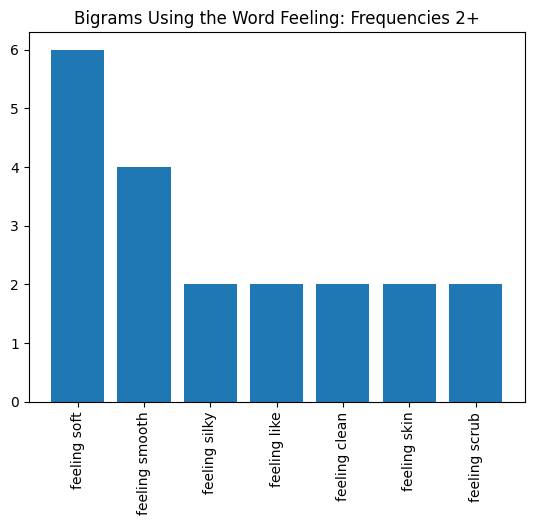

In [32]:
plt.bar(df_feeling_bg['Bigram'], height=df_feeling_bg['Frequency'])
plt.title('Bigrams Using the Word Feeling: Frequencies 2+')
plt.xticks(rotation=90)

# **Biagrams Graph Summary**
from the '**feeling**'and '**leaves**'plotted graph you can see most of the reviews said that the product **leaves** them **feeling** **soft** followed by **smooth**,**silk** and **clean**.

# **Tigram Collection**
For more specific information from the reviews,we will generate tigrams from the reviews of the product a year ago

In [36]:
mvt_1year = mvt.query('Review_Date == "1 year ago"')

In [37]:
trigrams = collections.Counter()
for phrase in mvt_1year['NLTK_Text']:
    trigrams.update(nltk.trigrams(phrase))
    
trigrams_sorted = sorted(trigrams.items(),key=operator.itemgetter(1),reverse=True)
trigrams_sorted[0:15]

[(('skin', 'feeling', 'soft'), 2),
 (('dead', 'skin', 'cells'), 2),
 (('skin', 'feels', 'smooth'), 2),
 (('makes', 'skin', 'feel'), 2),
 (('scrub', 'helped', 'lot'), 1),
 (('helped', 'lot', 'clean'), 1),
 (('lot', 'clean', 'skin'), 1),
 (('clean', 'skin', 'excess'), 1),
 (('skin', 'excess', 'sebum'), 1),
 (('best', 'face', 'scrub'), 1),
 (('face', 'scrub', 'sensitive'), 1),
 (('scrub', 'sensitive', 'skin'), 1),
 (('id', 'like', 'cancel'), 1),
 (('like', 'cancel', 'recurring'), 1),
 (('cancel', 'recurring', 'shipment'), 1)]

In [38]:
feel_reviews_tr = []

for trigram in trigrams_sorted:
    if 'feel' in trigram[0][0]:
        feel_reviews_tr.append(trigram)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'feel warmth product'),
  Text(1, 0, 'feels really good'),
  Text(2, 0, 'feel though see'),
  Text(3, 0, 'feels amazing smells'),
  Text(4, 0, 'feel warming sensation'),
  Text(5, 0, 'feeling soft smell'),
  Text(6, 0, 'feels smooth using'),
  Text(7, 0, 'feeling like silk'),
  Text(8, 0, 'feels soft great'),
  Text(9, 0, 'feels strong peeling'),
  Text(10, 0, 'feels toasty scrubby'),
  Text(11, 0, 'feeling warmth leaves'),
  Text(12, 0, 'feels amazing looks'),
  Text(13, 0, 'feels leaving facial'),
  Text(14, 0, 'feeling soft fresh')])

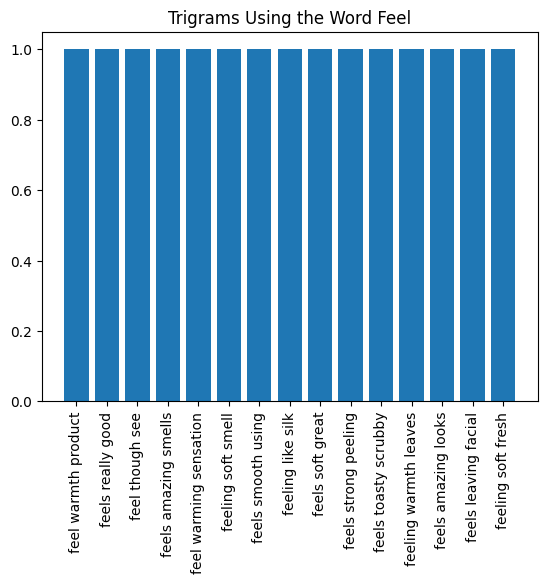

In [40]:
feel_trigram = []
feel_freq_tr = []

for review in feel_reviews_tr[0:15]:
    feel_freq_tr.append(review[1])
    feel_trigram.append(' '.join(review[0]))
    
df_feel_tr = pd.DataFrame({'Trigram':feel_trigram, 'Frequency':feel_freq_tr})

plt.bar(df_feel_tr['Trigram'], height=df_feel_tr['Frequency'])
plt.title('Trigrams Using the Word Feel')
plt.xticks(rotation=90)

# **Tigram Graph Summary**
The trigram bar plot revealed that trigrams in the reviews from a year ago specified the product leaving skin **feeling** **soft**, **clean** and **like** **silk**. It also left a **feeling** of **warmth**.